# Data Mining - Mini Lab
### Team 2 - Patricia Goresen, Jeffrey Lancon, Brychan Manry, George Sturrock
#### June 17, 2018
------

## Introduction
#### Data Description
The subject matter for this Lab assignment is the Team Level dataset from the Lahman baseball database, which was saved as a .csv file. The database and its variables were described in detail as part of  MSDS 7331 Lab 1. The summarized team level statistics generated in Lab 1 are used as the input data set for this study (Team2Plus.csv). The team level data was summarized from approximately 30,000 rows of data from team level statistics dating back to 1970 and payroll data.

Dataset: Team2Plus.csv {57 Attributes, 1324 observations}
 
#### Objective
The objective of this analysis is to create the best classification model to predict if an MLB team will make the MLB Playoffs given the available statistical data. To meet this objective, we will examine three different classifier models to determine which model produces the best accuracy, recall and precision scores. The three models are:  
    - Logistic Regression, using GridSearchCV, with manual variable reduction
    - Logistic Regression, using GridSearchCV, with Recursive Feature Elimination (RFE)
    - Support Vector Machine (SVM)

------

## Create Models
### Data Preparation

First, the Team2Plus.csv data set was loaded into python and an initial purging/modification of the data set is conducted. Attributes with little predictive value (i.e. ball park name(park), league ID (lgID), and disparate database identifiers) are removed. Attributes with near zero variance (such as games played) will also be removed.

Attributes which introduce ‘data leakage’; such as, Wins (W), Losses (L), Rank (Rank) and how far a team progressed in the playoffs) will be removed as well.

The data will then be split into explanatory ("X") (i.e. Attributes) and response ("Y") (Playoff Status) data frames to feed into the different classification models.

To improve accuracy and stability of the classification models, all attributes data will be scaled to have a mean of 0 and variance of 1.

To improve our models’ adaptability to new data and reduce the possibility of ‘over-fitting’, 10-fold cross validation will be employed. An 80/20 training/test set split will also be employed.

The Logistic Regression, using GridSearchCV, with manual variable reduction, classification model will utilize all remaining explanatory variables, after initial purging/modification of dataset, using correlation scores, variable inflation factors and significance scores to manually to determine the attributes that will be included in the final classification model. 

The Logistic Regression, using GridSearchCV, with Recursive Feature Elimination (RFE)" and "Support Vector Machine" models will also utilize all remaining attributes for their respective classification analysis. The team will allow the recursive feature elimination function and Support Vector Machine to determine which features to include in the end model on with no intervention.

Instead of manually adjusting model parameters such as; class_weight, solver, C-value, we utilized GridSearchCV feature in scikit-learn to automatically run through multiple combinations of model parameters, producing an optimal combination of model parameters.  This will produce the best classification model given the parameter ranges supplied. 

Model accuracy, recall and precision will be used to determine which model yields the best results for predicting whether or not a team will make the Major League Baseball Playoffs.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

team = pd.read_csv('./data/teams2Plus.csv')

#Convert Y/N playoff flag to 1/0 indicator
team['Playoff'] = team['Playoff'].map({'Y':1, 'N':0})

#Drop records with missing values in the Playoff column
team = team[np.isfinite(team['Playoff'])]
team.Playoff = team.Playoff.astype(int)

#Store all franchise IDs per row for future references
allfranchID = team['franchID']

#Create Y Response Variable DF
teamY = team['Playoff']

#Drop Categorial Columns with no predictive ability
team = team.drop(['teamIDBR', 'teamIDlahman45', 'teamIDretro', 'G', 'teamID', 'Ghome', 'name', 'park', 'lgID', 'divID', 'salary', 'attendance', 'Playoff'], axis=1)

#Drop Columns which introduce leakage
team = team.drop(['LgWin', 'DivWin', 'WCWin', 'WSWin', 'W', 'L', 'Rank'], axis=1)

#Create Cross Validation Object with 10 folds with 80/20 train - test split
cv = ShuffleSplit(n_splits = 10, test_size=0.20, random_state=0)

#Also create Test set for 2017
team2017 = team.loc[team['yearID'] == 2017]
franchid2017 = team2017['franchID']

#Drop last categorial column now that it has been preserved
team = team.drop(['franchID'], axis=1)
team2017 = team2017.drop(['franchID'], axis=1)

#Create X Explanatory Variables DF to support the individual models
teamX = team
teamXRfecv = team
teamXSVM = team
teamXRfecv = teamXRfecv.drop(['Unnamed: 0'], axis=1)
teamXSVM = teamXSVM.drop(['Unnamed: 0'], axis=1)
print("teamXRfecv", teamXRfecv.info())
print("teamXSVM", teamXSVM.info())

print("Team DF")
team.info()
#teamX_colNames = list(teamX)

print("Team 2017")
team2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 0 to 1323
Data columns (total 36 columns):
yearID    1296 non-null int64
R         1296 non-null int64
AB        1296 non-null int64
H         1296 non-null int64
2B        1296 non-null int64
3B        1296 non-null int64
HR        1296 non-null int64
BB        1296 non-null float64
SO        1296 non-null float64
SB        1296 non-null float64
CS        1296 non-null float64
HBP       1296 non-null float64
SF        1296 non-null float64
RA        1296 non-null int64
ER        1296 non-null int64
ERA       1296 non-null float64
CG        1296 non-null int64
SHO       1296 non-null int64
SV        1296 non-null int64
IPouts    1296 non-null int64
HA        1296 non-null int64
HRA       1296 non-null int64
BBA       1296 non-null int64
SOA       1296 non-null int64
E         1296 non-null int64
DP        1296 non-null int64
FP        1296 non-null float64
BPF       1296 non-null int64
PPF       1296 non-null int64
WHIP   

In [2]:
#Last check for NA values
team.isnull().sum()

Unnamed: 0    0
yearID        0
R             0
AB            0
H             0
2B            0
3B            0
HR            0
BB            0
SO            0
SB            0
CS            0
HBP           0
SF            0
RA            0
ER            0
ERA           0
CG            0
SHO           0
SV            0
IPouts        0
HA            0
HRA           0
BBA           0
SOA           0
E             0
DP            0
FP            0
BPF           0
PPF           0
WHIP          0
KBB           0
KAB           0
Bavg          0
Slug          0
OBP           0
OPS           0
dtype: int64

#### Colinearity
During our initial data exploration of the dataset, performed in Lab 1, collinearity was identified as a significant issue with this data set.  

##### Logistic Regression - manual variable reduction:
Highly correlated and redundant features will be identified and removed prior to implementing the "Logistic Regression, using GridSearchCV, with manual variable reduction" classification model.  Though collinearity is an objective measurement, some subjective discretion will be exercised when removing features.

##### Logistic Regression - Recursive Feature Elimination (RFE) & Support Vector Machine (SVM)
For the Logistic RFE and SVM classification models, no correlation analysis, attribute elimination, will be performed.  The models will us the full set of attributes to develop the model. 

##### Starting Colinearity
Given the correlation results below, there are numerous highly correlated attributes.  Given the makeup of this dataset, this is to be expected. Many of the attributes are either averages {Earned Runs (ER) - Earned Runs Average (ERA)}, inverses {Fielding Percentages (FP) - Errors (E)}, or multiplication of two or more attributes.  

In [3]:
#Create correlation matrix
teamCorrMat = team.corr()

# Highest Correlation Pairs
corrPairs = teamCorrMat.unstack().sort_values(kind="quicksort")
#- REMOVE DUPLICATES
corrPairs = corrPairs[::2]
corrPairs = corrPairs[corrPairs.index.get_level_values(0) != corrPairs.index.get_level_values(1)]
with pd.option_context('display.max_rows',10):
    print(corrPairs)

FP          E            -0.958084
CG          yearID       -0.828620
            Unnamed: 0   -0.820053
SHO         ERA          -0.669942
WHIP        SHO          -0.651043
                            ...   
KAB         SO            0.973806
OPS         Slug          0.974699
BPF         PPF           0.978014
RA          ER            0.985641
Unnamed: 0  yearID        0.999068
Length: 666, dtype: float64


##### Ending Colinearity

The team manually reviewed the attributes list. Utilizing the results from the correlation table, to guide us in eliminating highly correlated attributes. The team eliminated a total of 29 attributes.

In [4]:
#Drop highly correlated, insignificant and high VIF columns.
teamX = team.drop(['CS', 'BB', 'SB', '2B', '3B', 'BBA', 'DP', 'HR', 'yearID', 'WHIP', 'HA', 'HBP', 'Slug', 'SF', 'OPS', 'Bavg', 'SOA', 'KAB', 'SHO', 'FP', 'E', 'ER', 'IPouts', 'SO', 'BPF', 'PPF', 'Unnamed: 0', 'ERA', 'H'], axis=1)

#Create correlation matrix
teamCorrMat = teamX.corr()

# Highest Correlation Pairs
corrPairs = teamCorrMat.unstack().sort_values(kind="quicksort")
#- REMOVE DUPLICATES
corrPairs = corrPairs[::2]
corrPairs = corrPairs[corrPairs.index.get_level_values(0) != corrPairs.index.get_level_values(1)]
with pd.option_context('display.max_rows',10):
    print(corrPairs)

SV   CG    -0.521343
HRA  CG    -0.517123
KBB  CG    -0.450180
CG   RA    -0.330862
R    CG    -0.233253
              ...   
AB   RA     0.494169
HRA  R      0.524398
R    AB     0.578170
RA   HRA    0.743288
OBP  R      0.814649
Length: 28, dtype: float64


#### Scale Data
To improve accuracy and stability of the classification models and to not over emphasize large value attributes, all attribute data will be scaled to have a mean of 0 and variance of 1 for all models in this report.

Several features in the data set are decimal measurements that will never exceed 1.  The realistic range of Batting Average (Bavg) range is 0.21 to 0.30.  Other features such as At-Bats (AB) could range 3500 to 5800.

In [5]:
from sklearn.preprocessing import StandardScaler

#Scale data
scaler = StandardScaler()
teamX_scaled = scaler.fit_transform(teamX)
teamXRfecv_scaled = scaler.fit_transform(teamXRfecv)
teamXSVM_scaled = scaler.fit_transform(teamXSVM)

#Save as data frames
df_teamX_scaled = pd.DataFrame(teamX_scaled)
df_teamXRfecv_scaled = pd.DataFrame(teamXRfecv_scaled)
df_teamXSVM_scaled = pd.DataFrame(teamXSVM_scaled)


#### Variance Inflation Factors (VIF)
VIF will also be addressed prior to running the "GridSearchCV Logistic Regression with manual variable reduction" model.  For reference, we explored  VIF factors for the original Team attributed data set.  It shows several features with high VIF Factors.  There is not hard-rule as to what value of VIF is acceptable but many 'rule-of-thumb' values suggested are values below 10 are acceptable.  Some of the VIF values are in the 1000s. 

High VIF factors is another indication that scaling and correlation attribute reduction is essential to creating a stable classification model.
 

##### Beginning VIF- Logistic Regression-Manual Reduction

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df2_vif = pd.DataFrame()
df2_vif["VIF Factor"] = [vif(team.values, i) for i in range(team.shape[1])]
#df2_vif["features"] = df_teamX_scaled.columns
df2_vif["features"] = team.columns
df2_vif

,VIF Factor,features
0,1.077363e+03,Unnamed: 0
1,5.433994e+06,yearID
2,1.211189e+03,R
3,3.266656e+05,AB
4,2.297657e+05,H
5,4.792292e+03,2B
6,3.276009e+02,3B
7,1.407856e+04,HR
8,2.019001e+04,BB
9,3.838337e+04,SO


##### Ending VIF - Logistic Regression-Manual Reduction
After applying a threshold of 10 and using the Logistic Regression-with manual variable reduction, dataset, the VIF factors have been reduced significantly and are in an acceptable range.

In [7]:
#Credit to:
###https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python
###https://etav.github.io/python/vif_factor_python.html

#from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

df2_vif = pd.DataFrame()
df2_vif["VIF Factor"] = [vif(df_teamX_scaled.values, i) for i in range(df_teamX_scaled.shape[1])]
#df2_vif["features"] = df_teamX_scaled.columns
df2_vif["features"] = teamX.columns
df2_vif

,VIF Factor,features
0,8.395007,R
1,3.138265,AB
2,5.591007,RA
3,2.977814,CG
4,2.184272,SV
5,3.826117,HRA
6,2.447916,KBB
7,5.039360,OBP


#### Check Feature Significance

In [8]:
#Logistic Regression Summary table with full model fit prior to scaling, cross validation or recursive 
#feature elimination.
#Cursory check to verify feature significance

import statsmodels.api as sm
logit_model = sm.Logit(teamY, teamX)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.245847
         Iterations 8
                        Results: Logit
Model:              Logit            No. Iterations:   8.0000  
Dependent Variable: Playoff          Pseudo R-squared: 0.484   
Date:               2018-06-18 04:55 AIC:              653.2342
No. Observations:   1296             BIC:              694.5705
Df Model:           7                Log-Likelihood:   -318.62 
Df Residuals:       1288             LL-Null:          -618.03 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------
R        0.0274     0.0022   12.5624   0.0000    0.0231    0.0317
AB      -0.0027     0.0005   -5.7628   0.0000   -0.0036   -0.0018
RA      -0.0202     0.0027   -7.4099   0.0000   -0.0255   -0.0148
CG       0.0340

### Logistic Regresssion

#### Classifier Evaluation

In [9]:
#Credit To:  https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Models/2017ComparingSegregatedHighSchoolCampuses.ipynb

from sklearn.model_selection import cross_validate
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

results = []

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv, model):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, teamX, teamY, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']
    
    results.append({'Model': model, 'Accuracy': Accavg, 'Precision': Preavg, 'Recall': Recavg})

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, teamX, teamY, cv=cv)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(Y,predictions)
    confMat = confusion_matrix(Y,predictions)
    acc = accuracy_score(Y,predictions)
    
    print (classReport)
    print (confMat)
    print (acc)

#### GridSearchCV Logistic Regression with Manual Feature Reduction

Instead of manually adjusting model parameters such as; class_weight, max_iter, C-value, we utilized GridSearchCV feature to automatically run through multiple combinations of model parameters, producing an optimal combination of model parameters.

In [10]:
#Logisitic regression 10-fold cross-validation 
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()

parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [0]
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
#regGridSearch.fit(teamX, teamY)
regGridSearch.fit(df_teamX_scaled, teamY)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=8)]: Done  60 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 280 out of 280 | elapsed:    2.6s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'random_state': [0], 'solver': ['lbfgs'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': ['balanced', 'none'], 'penalty': ['l2'], 'max_iter': [100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [11]:
#Diplay the top model parameters
regGridSearch.best_estimator_.coef_

array([[ 2.60519102, -0.76252932, -1.97336804,  0.53512682,  1.0217957 ,
        -0.51143328,  0.46728398,  0.06831141]])

##### Accuacy Precision, Recall, Attribute Weights, Model Parameters
    
The average accuracy, precision, and recall for the cross-validation folds is listed below.

The Logistic-Manual optimal model parameters and parameter weights are also listed below."


In [12]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
#EvaluateClassifierEstimator(classifierEst, df_teamX_scaled, teamY, cv, "manual")

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
print("\n",round(EvaluateClassifierEstimator(classifierEst, df_teamX_scaled, teamY, cv, "manual"),4))

#Use the best parameters for our Linear Regression object",
ClassiferParams = regGridSearch.best_params_
print("\n---- Logistic Regression - CV, Scaled 'Manual' Attr Elimination ----")
for keys,values in ClassiferParams.items():
    print(keys,": \t ",values)
    
# sort these attributes and spit them out\n",
name = teamX
zip_vars = zip(regGridSearch.best_estimator_.coef_.T,name) # combine attributes
zip_vars = sorted(zip_vars, reverse=True)

# Print out Attributes and their weights\n",
print("\n---- Attributes and their weights -----\n")
for coef, name in zip_vars:
    print(name, ' has weight of', coef[0])

The average accuracy for all cv folds is: 			 0.89385
The average precision for all cv folds is: 			 0.76719
The average recall for all cv folds is: 			 0.61226
*********************************************************
Cross Validation Fold Mean Error Scores

    Accuracy  Precision  Recall
0    0.8846     0.7000  0.6087
1    0.8885     0.7576  0.5435
2    0.9038     0.8182  0.6792
3    0.8846     0.7600  0.6786
4    0.9077     0.8333  0.6731
5    0.9000     0.7778  0.6087
6    0.8538     0.7436  0.5088
7    0.8962     0.7500  0.5581
8    0.9000     0.7895  0.6250
9    0.9192     0.7419  0.6389

---- Logistic Regression - CV, Scaled 'Manual' Attr Elimination ----
random_state : 	  0
solver : 	  lbfgs
C : 	  10
class_weight : 	  none
max_iter : 	  100
penalty : 	  l2

---- Attributes and their weights -----

R  has weight of 2.6051910192004675
SV  has weight of 1.0217957001288345
CG  has weight of 0.5351268157203564
KBB  has weight of 0.4672839844241071
OBP  has weight of 0.068311405746

In [13]:
#Predictions using Grid Search CV
#print("Plain GridSearch Prediction")
#print(regGridSearch.predict(teamX))
#print(regGridSearch.predict_proba(teamX))
#print(regGridSearch.predict(df_teamX_scaled))
#print(regGridSearch.predict_proba(df_teamX_scaled))

#Is there a difference between .predict and .best_estimator_.predict?  Nope.
print("Best Estimator GridSearch Prediction")
#print(regGridSearch.best_estimator_.predict(teamX))
#print(regGridSearch.best_estimator_.predict_proba(teamX))
print(regGridSearch.best_estimator_.predict(df_teamX_scaled))
print(regGridSearch.best_estimator_.predict_proba(df_teamX_scaled))

Best Estimator GridSearch Prediction
[0 1 0 ... 0 0 1]
[[0.994294   0.005706  ]
 [0.08913697 0.91086303]
 [0.66284756 0.33715244]
 ...
 [0.99568585 0.00431415]
 [0.99548092 0.00451908]
 [0.26457073 0.73542927]]


#### GridSearchCV Logistic Regression with Recursive Feature Elimination

In [14]:
#Credit to:  Jake Drew NC Education Data Set Analysis

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit


print("RFECV Logistic Regression 1st Pass")
rfecvEstimator = LogisticRegression()

parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [0]
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
rfecvGridSearch = GridSearchCV(estimator=rfecvEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data using RFECV
rfecvGridSearch.fit(df_teamXRfecv_scaled, teamY)

#Use the best parameters for our RFECV Linear Regression object
rfecvClassifierEst = rfecvGridSearch.best_estimator_

#Recursive Feature Elimination
rfecv = RFECV(estimator=rfecvClassifierEst, step=1, cv=cv, scoring='accuracy', verbose=1)
#X_BestFeatures = rfecv.fit_transform(teamX, teamY)
X_BestFeatures = rfecv.fit_transform(df_teamXRfecv_scaled, teamY)

#Print RFECV Details
print("Ranking", rfecv.ranking_)
print("Support", rfecv.support_)
print("Number of Features:", rfecv.n_features_)

print("Logistic Regression Second Pass")
#create a pipeline to scale all of the data and perform logistic regression during each grid search step.
pipe = make_pipeline(StandardScaler(), LogisticRegression())

#Define a range of hyper parameters for grid search
parameters = { 'logisticregression__penalty':['l2']
              ,'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'logisticregression__class_weight': ['balanced','none']
              ,'logisticregression__random_state': [0]
              ,'logisticregression__solver': ['lbfgs']
              ,'logisticregression__max_iter':[100,500]
             }

#Perform the grid search using accuracy as a metric during cross validation.
grid = GridSearchCV(pipe, parameters, cv=cv, scoring='accuracy')

#Use the best features from recursive feature elimination during the grid search
grid.fit(df_teamXRfecv_scaled, teamY)

RFECV Logistic Regression 1st Pass
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 265 out of 280 | elapsed:   10.1s remaining:    0.6s
[Parallel(n_jobs=8)]: Done 280 out of 280 | elapsed:   11.6s finished


Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 fea

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'logisticregression__solver': ['lbfgs'], 'logisticregression__class_weight': ['balanced', 'none'], 'logisticregression__random_state': [0], 'logisticregression__penalty': ['l2'], 'logisticregression__max_iter': [100, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [15]:
#Use the best parameters from RFECV for our Linear Regression object

EvaluateClassifierEstimator(rfecvClassifierEst, df_teamXRfecv_scaled, teamY, cv, 'Rfecv')

The average accuracy for all cv folds is: 			 0.88846
The average precision for all cv folds is: 			 0.75864
The average recall for all cv folds is: 			 0.58567
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.892308,0.736842,0.608696
1,0.888462,0.757576,0.543478
2,0.884615,0.755556,0.641509
3,0.865385,0.723404,0.607143
4,0.900000,0.842105,0.615385
5,0.896154,0.787879,0.565217
6,0.853846,0.743590,0.508772
7,0.896154,0.750000,0.558140
8,0.900000,0.789474,0.625000
9,0.907692,0.700000,0.583333


In [16]:
#print(grid.best_estimator_.predict(teamX))
#print(grid.best_estimator_.predict_proba(teamX))
print(grid.best_estimator_.predict(df_teamXRfecv_scaled))
print(grid.best_estimator_.predict_proba(df_teamXRfecv_scaled))

#Use the best parameters for our RFECV Regression object
rfecvClassifierEst = rfecvGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
#EvaluateClassifierEstimator(classifierEst, df_teamX_scaled, teamY, cv, "manual")

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
print("\n",round(EvaluateClassifierEstimator(rfecvClassifierEst, df_teamXRfecv_scaled, teamY, cv, "manual"),4))

#Use the best parameters for our RFECV Regression object",
rfecvClassiferParams = rfecvGridSearch.best_params_
print("\n---- RFECV Regression - CV, Scaled ----")
for keys,values in rfecvClassiferParams.items():
    print(keys,": \t ",values)
    
# sort these attributes and spit them out\n",
name = teamX
zip_vars = zip(rfecvGridSearch.best_estimator_.coef_.T,name) # combine attributes
zip_vars = sorted(zip_vars, reverse=True)

# Print out Attributes and their weights\n",
print("\n---- Attributes and their weights -----\n")
for coef, name in zip_vars:
    print(name, ' has weight of', coef[0])

[0 1 0 ... 0 0 1]
[[0.99643346 0.00356654]
 [0.07125492 0.92874508]
 [0.80909222 0.19090778]
 ...
 [0.9950237  0.0049763 ]
 [0.99603725 0.00396275]
 [0.31209965 0.68790035]]
The average accuracy for all cv folds is: 			 0.88846
The average precision for all cv folds is: 			 0.75864
The average recall for all cv folds is: 			 0.58567
*********************************************************
Cross Validation Fold Mean Error Scores

    Accuracy  Precision  Recall
0    0.8923     0.7368  0.6087
1    0.8885     0.7576  0.5435
2    0.8846     0.7556  0.6415
3    0.8654     0.7234  0.6071
4    0.9000     0.8421  0.6154
5    0.8962     0.7879  0.5652
6    0.8538     0.7436  0.5088
7    0.8962     0.7500  0.5581
8    0.9000     0.7895  0.6250
9    0.9077     0.7000  0.5833

---- RFECV Regression - CV, Scaled ----
random_state : 	  0
solver : 	  lbfgs
C : 	  100
class_weight : 	  none
max_iter : 	  500
penalty : 	  l2

---- Attributes and their weights -----

AB  has weight of 2.687621638693715

### Support Vector Machine

In [17]:
#SVM for consolidated team level baseball data created in Lab 1.
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt

#scaler = StandardScaler()

#teamX_scaled = scaler.fit_transform(teamX)

#train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(df_teamXSVM_scaled, teamY)  # train object

y_hat = svm_clf.predict(df_teamXSVM_scaled)

acc = mt.accuracy_score(teamY,y_hat)
conf = mt.confusion_matrix(teamY,y_hat)
prec = mt.precision_score(teamY, y_hat)
recall = mt.recall_score(teamY, y_hat)
print('accuracy:', acc )
print('precision:', prec)
print('recall:', recall)
print(conf)

results.append({'Model': 'SVM', 'Accuracy': acc, 'Precision': prec, 'Recall': recall})

accuracy: 0.8865740740740741
precision: 0.837037037037037
recall: 0.47478991596638653
[[1036   22]
 [ 125  113]]


In [18]:
#look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )


(484, 36)
(484,)
[257 227]


In [19]:
# SVM based Prediction
print(y_hat)

[0 1 0 ... 0 0 1]


### Create Model Summary
All three planned models were sucessfully implemented as planned.  All models utilized cross validation to control results.  Stochastic Gradient Descent was not utilized for the support vector machine model as the size of the data set did not warrant it use.  Good results were achieved by all models.  The "GridSearchCV Logistic Regression with manual variable reduction" model ultimately produced the best accuracy and overall results.  The results are summarized in the table below.

In [20]:
df_results = pd.DataFrame(results)
df_results = df_results[['Model', 'Accuracy', 'Precision', 'Recall']]
df_results

,Model,Accuracy,Precision,Recall
0,manual,0.893846,0.767187,0.612256
1,Rfecv,0.888462,0.758643,0.585667
2,manual,0.888462,0.758643,0.585667
3,SVM,0.886574,0.837037,0.474790


## Model Advantages

Logistic regression and support vector machines are both machine learning models used for classification and regression analysis. Logistic regression's algorithm is centered on maximizing the probability of the data. The logistic regression model's accuracy is best when the data lies far from the separating line or hyperplane. The SVM algorithm is centered on finding the separating line or hyperplane that maximizes the distance the closest points are to the margin, known as the support vectors. These goals cause the logistic regression to be probabilistic, while SVMs are deterministic. We used two different types of logistic regression models. The first model used manual variable selection; we used correlation scores, variable inflation factors and significance scores to manually reduce the number of features input into the regression function. The recursive model repeatedly constructs a model and chooses the best or worst performing feature, puts that feature aside, then repeats the process until all variables have been analyzed. The SVM model used is a radial basis function SVM. It is a non-linear SVM model that creates hyperplanes in infinite dimensional space. The source data used in the analysis is mapped to a higher dimensional space and as a result, is very different from the original data.

There are advantages associated with both models. Overall, and as seen in our outcome, logistic regression and SVMs perform relatively similarly. We can see this in our accuracy, the logistic regression models and SVM model's accuracy are all within 1% accuracy of the other. The highest performing model in terms of accuracy was the manual logistic regression model with 89.39% accuracy. We can also compare these models in terms of precision and recall. Recall is defined as the correctly classified events to the number of all correct events. Precision measures the events correctly recalled to all events recalled; it is measuring how precise the recalls are. In our models, the precision was much higher in the SVM model with 83.7% precision. The logistic regression models performed very similarly to one another with manual having 76.71% precision and the RFE model having 75.86% precision. The manual logistic regression model performed much better than the others in terms of recall, 61.22%. The RFE model had a recall ratio of 58.56%, while the SVM only had a recall ratio of 47.47%. Comparing these three values, the manual logistic regression model seemed to perform the best for our data.

Another aspect to evaluate is the amount of time needed to create, tune and optimize the models. The manual logistic regression model does use GridSearchCV to automate parameter selection. However, the individual features must be examined and tested manually to find the best model. This requires quite a bit of human capital to complete. Conversely, the RFE and SVM models do the feature selection automatically. After the initial programming is complete, the time needed to tune the RFE and SVM models is minimal compared to the manual model. In an agile environment, RFE and/or SVM could be used to produce a quality model quickly to solve a business problem while alternative models are being developed or prototyped.

The intended use of the model could also impact the decision. If the model is to serve a one-time need, the manual model would likely be the correct choice with it high accuracy and all-around results. However, if the model is intended to be implemented in a production environment and run on a routine basis, SVM and the RFE model may be a better choice. Both models can optimize feature selection as more data is collected with little human intervention. The manual model must be reviewed and maintained manually to assure optimal results are returned. In the end, the problem to be solved must be understood to select the appropriate classification model.


#### Key References

https://github.com/eclarson/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb
https://github.com/jakemdrew/EducationDataNC/blob/master/2017/Models/2017ComparingSegregatedHighSchoolCampuses.ipynb (Logit)
http://www.cs.toronto.edu/~kswersky/wp-content/uploads/svm_vs_lr.pdf


### Feature Importance for Logistic Regression
By taking a closer look the feature weights in the logistic models we can get a better idea of which variables are the most important drivers of a team making it to the playoffs. Since the two logistic regression models used normalized features we can directly compare the weights across the included features within each model.

*Manural Variable Selection Model*

The most important variable for the manual regression model, unsurprisingly, is the total number of runs scored. This makes sense as one would expect that the total number of runs scored would be higher for teams who make it to the playoffs and therefore should be a good classifier. Similarly, the model has total runs against as the second most important variable. However, that feature has a negative weight indicating that the more runs a team gives up the less likely they are to make the playoffs.

For each of the following features in the manual model, most of the weights make sense directionally from an intuitive sense. A positive weight for saves would indicate a strong bullpen which would increase a team’s odds of making the playoffs; an increase in home runs allowed might indicate weaker pitching and would decrease a team’s odds. 

*Recursive Selection Model*

The reclusive model in contrast has a few features that have weights that are directionally opposite of what one would expect intuitively. For example, the total number of home runs hit by a team is one of the most important variables based on weight, but is has a negative weight suggesting that an increase in home runs actually reduces a team's chances of making the playoffs. This may in fact be true, but it might also be a result of correlation between features. 

Slugging percentage is the most important variable in the model and a big part of the slugging percentage formula is home runs. This relationship between features might cause issues in the model if both are included. This might be one reason the manual model out performed the reclusive model.

As we get further down the list of variables the weights become increasingly smaller indicating features are less important classifiers of a team making the playoffs. The variables with the lowest weights in the recursive model include: total shut outs, sacrifice flies, and stolen bases. These events, though they might turn the course of a few games, are all events that are relatively rare in baseball and in turn do not have much influence on a team making the playoffs.


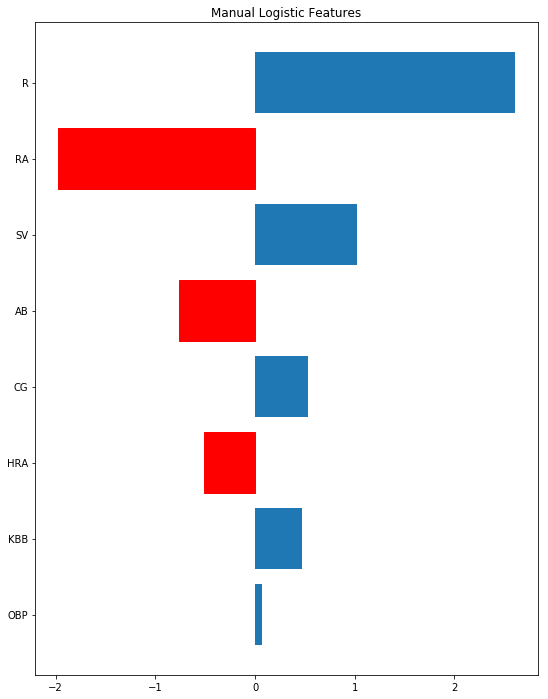

In [26]:
from matplotlib import pyplot as plt

def plotCoef(coef, names, t):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names), key=lambda x: abs(x[0])))
    plt.figure(figsize=(9,12))
    barlist = plt.barh(range(len(names)), imp, align='center')
    for x in np.nditer(np.where(np.asarray(list(imp)) < 0)):
        barlist[x].set_color('r')
    plt.yticks(range(len(names)), names)
    plt.title(t)
    plt.show()

plotCoef(regGridSearch.best_estimator_.coef_[0], teamX.columns.values, "Manual Logistic Features")

In [22]:
list(sorted(zip(regGridSearch.best_estimator_.coef_.ravel(), teamX.columns.values)))

[(-1.9733680431512168, 'RA'),
 (-0.7625293211402436, 'AB'),
 (-0.5114332840180851, 'HRA'),
 (0.06831140574678325, 'OBP'),
 (0.4672839844241071, 'KBB'),
 (0.5351268157203564, 'CG'),
 (1.0217957001288345, 'SV'),
 (2.6051910192004675, 'R')]

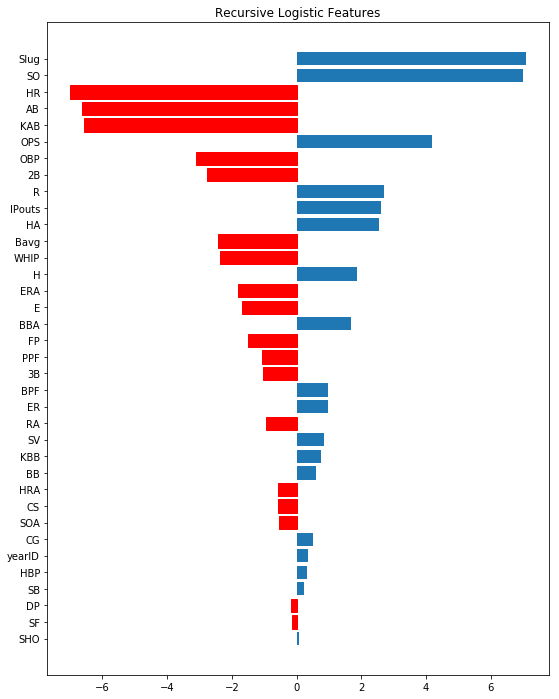

In [23]:
plotCoef(grid.best_estimator_.named_steps['logisticregression'].coef_.ravel(), teamXRfecv.columns.values, "Recursive Logistic Features")

In [24]:
list(sorted(zip(grid.best_estimator_.named_steps['logisticregression'].coef_.ravel(), teamXRfecv.columns.values)))

[(-7.003154170669808, 'HR'),
 (-6.628654171063708, 'AB'),
 (-6.576757177976101, 'KAB'),
 (-3.1022377991146706, 'OBP'),
 (-2.7828015754723174, '2B'),
 (-2.435341084723699, 'Bavg'),
 (-2.3513846030647, 'WHIP'),
 (-1.823713026408414, 'ERA'),
 (-1.6829684649868564, 'E'),
 (-1.4964202271751081, 'FP'),
 (-1.0756176228805754, 'PPF'),
 (-1.033984430383552, '3B'),
 (-0.9586807081124191, 'RA'),
 (-0.5691447321438317, 'HRA'),
 (-0.5661809010962338, 'CS'),
 (-0.536454348215939, 'SOA'),
 (-0.1578284059262083, 'DP'),
 (-0.1344868687822673, 'SF'),
 (0.06578926360229494, 'SHO'),
 (0.22109185979946258, 'SB'),
 (0.32964510490398286, 'HBP'),
 (0.34513512263667107, 'yearID'),
 (0.49399744915611626, 'CG'),
 (0.6004740035266756, 'BB'),
 (0.7533487350919159, 'KBB'),
 (0.8516844875838545, 'SV'),
 (0.9624761750502375, 'ER'),
 (0.9663778361085974, 'BPF'),
 (1.6704957429980387, 'BBA'),
 (1.8579652016984864, 'H'),
 (2.550246565015705, 'HA'),
 (2.6194370302849315, 'IPouts'),
 (2.6870425007305045, 'R'),
 (4.1842880

#### Interpreting SVM Fields
For SVM models, the interpretation of field importance is not as straight forward. Non-linear SVM models create hyperplanes in  infinite dimensional space. To accomplish this the source data used in the analysis must be mapped to a higher dimentional space and as a result is very different from the original data. Because of this it is not possible to determine feature weights like we did with the logisitc regessions above.

However, we can examine individual features to investigate how SVM approaches classification problems.  If Runs and Runs Allowed are examined individually,  SVM will attempt to classify whether or not a team will make the playoffs using only these two features.  As seen in the plot below, the linear kernel SVM identifies the separation between playoff teams and the rest of the league by Runs and Runs Allowed.  Though there are some exceptions, teams that score more runs than they allow by a certain margin make the playoffs.  Though this is not a new discovery, the power of SVM is illustrated in this example.  

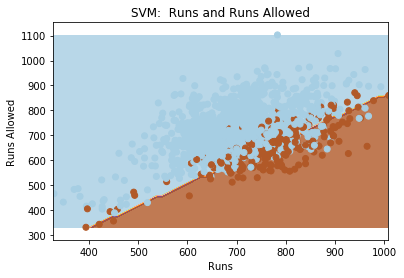

In [27]:
#Credit To:
####http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html
from matplotlib import pyplot as plt

#R and RA
pX = pd.DataFrame()

pX['a'] = teamXSVM['R']
pX['b'] = teamXSVM['RA']

psvc = SVC(kernel='linear', C=0.5, gamma='auto').fit(pX, teamY)

pXAmin = pX['a'].min() - 1
pXAmax = pX['a'].max() + 1
pXBmin = pX['b'].min() - 1
pXBmax = pX['b'].max() + 1

pxx, pyy = np.meshgrid(np.arange(pXAmin, pXAmax, 10), np.arange(pXBmin, pXBmax, 10))

plt.subplot(1, 1, 1)

pZ = psvc.predict(np.c_[pxx.ravel(), pyy.ravel()])

pZ = pZ.reshape(pxx.shape)
plt.contourf(pxx, pyy, pZ, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(pX['a'], pX['b'], c=teamY, cmap=plt.cm.Paired)
plt.xlabel('Runs')
plt.ylabel('Runs Allowed')
plt.xlim(pxx.min(), pxx.max())
plt.title('SVM:  Runs and Runs Allowed')
plt.show()